In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
# libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# pd.options.display.max_columns=200
#pd.options.display.max_rows=200

# DATASET

-  BALANCE : Balance amount left in customers account to make purchases
-  BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1
-  PURCHASES : Amount of purchases made from account
-   PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1
-  ONEOFF_PURCHASES : Maximum purchase amount done in one-go
-   ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go
-   INSTALLMENTS_PURCHASES : Amount of purchase done in installment
-   CASH_ADVANCE : Cash in advance given by the user
-   PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done
-   CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
-   CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
-   PURCHASES_TRX : Numbe of purchase transactions made
-   CREDIT_LIMIT : Limit of Credit Card for user
-   PAYMENTS : Amount of Payment done by user
-   MINIMUM_PAYMENTS : Minimum amount of payments made by user
-  PRCFULLPAYMENT : Percent of full payment paid by user
-  TENURE : Tenure of credit card service for user


In [3]:
# loading the dataset
cc=pd.read_csv("data_credit_card_customer_seg.csv")
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# shape
cc.shape

(8950, 18)

In [5]:
# mathematical features
cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
cc.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [7]:

# null values
cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# % of null values
round(cc.isnull().sum()*100/len(cc),4)

CUST_ID                             0.0000
BALANCE                             0.0000
BALANCE_FREQUENCY                   0.0000
PURCHASES                           0.0000
ONEOFF_PURCHASES                    0.0000
INSTALLMENTS_PURCHASES              0.0000
CASH_ADVANCE                        0.0000
PURCHASES_FREQUENCY                 0.0000
ONEOFF_PURCHASES_FREQUENCY          0.0000
PURCHASES_INSTALLMENTS_FREQUENCY    0.0000
CASH_ADVANCE_FREQUENCY              0.0000
CASH_ADVANCE_TRX                    0.0000
PURCHASES_TRX                       0.0000
CREDIT_LIMIT                        0.0112
PAYMENTS                            0.0000
MINIMUM_PAYMENTS                    3.4972
PRC_FULL_PAYMENT                    0.0000
TENURE                              0.0000
dtype: float64

In [9]:
# column information
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
# checking for columns with null values
cc.loc[:, cc.isnull().any()]

,CREDIT_LIMIT,MINIMUM_PAYMENTS
0,1000.0,139.509787
1,7000.0,1072.340217
2,7500.0,627.284787
3,7500.0,NaN
4,1200.0,244.791237
...,...,...
8945,1000.0,48.886365
8946,1000.0,NaN
8947,1000.0,82.418369
8948,500.0,55.755628


In [11]:
#df.dropna(subset=['Name'])

cc=cc.dropna(subset=["CREDIT_LIMIT"])

# dropping the one row of null value.

In [12]:
cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
# we see that there are columns where "MINIMUM_PAYMENTS"=null but PAYMENTS has some value
# so we assume that the customers with null min_payment have not pais, so converting the values to zero.

In [14]:
#df1 = df[df.isna().any(axis=1)]
ccnull=cc[cc.isna().any(axis=1)]

In [15]:
ccnull[ccnull["MINIMUM_PAYMENTS"].isnull() & ccnull["PAYMENTS"]!=0]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
54,C10056,6.660517,0.636364,310.00,0.00,310.00,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
99,C10104,0.000000,0.000000,0.00,0.00,0.00,89.849004,0.000000,0.000000,0.000000,0.142857,1,0,3000.0,138.021428,NaN,0.0,7
146,C10152,19.354559,0.909091,689.70,0.00,689.70,0.000000,0.833333,0.000000,0.833333,0.000000,0,10,10000.0,746.691026,NaN,0.0,12
319,C10330,0.478714,0.090909,734.97,159.00,575.97,0.000000,0.833333,0.083333,0.750000,0.000000,0,16,6000.0,1159.135064,NaN,0.0,12
1155,C11198,34.207779,0.090909,2483.26,2483.26,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,10000.0,29272.486070,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8561,C18794,3.229304,0.545455,190.20,0.00,190.20,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1500.0,295.937124,NaN,0.0,12
8593,C18827,16.887571,0.363636,1083.00,1083.00,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,1200.0,3905.430817,NaN,0.0,12
8647,C18882,0.006651,0.142857,0.00,0.00,0.00,164.137866,0.000000,0.000000,0.000000,0.142857,1,0,1200.0,5.070726,NaN,0.0,7
8753,C18992,0.223351,0.090909,336.00,0.00,336.00,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1000.0,578.819329,NaN,0.0,12


In [16]:
# we see that 

In [17]:
cc['MINIMUM_PAYMENTS'].fillna(cc['MINIMUM_PAYMENTS'].mean(), inplace=True)
#cc["MINIMUM_PAYMENTS"]=cc["MINIMUM_PAYMENTS"].fillna(mean)

In [18]:
# now we do not have any null values.
cc.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [19]:
cc.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [20]:
cc.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [21]:
cc["TOT_TRX"]=cc["CASH_ADVANCE_TRX"]+cc["PURCHASES_TRX"]
cc.drop(["CASH_ADVANCE_TRX","PURCHASES_TRX"], axis=1, inplace=True)
cc

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOT_TRX
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,1000.0,201.802084,139.509787,0.000000,12,2
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,7000.0,4103.032597,1072.340217,0.222222,12,4
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,7500.0,622.066742,627.284787,0.000000,12,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,7500.0,0.000000,864.304943,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,1000.0,325.594462,48.886365,0.500000,6,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,1000.0,275.861322,864.304943,0.000000,6,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,1000.0,81.270775,82.418369,0.250000,6,5
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,500.0,52.549959,55.755628,0.250000,6,2


In [22]:
cc["TOT_TRANSACTION"]=cc["PURCHASES"]+cc["CASH_ADVANCE"]
cc.drop(["PURCHASES","CASH_ADVANCE"], axis = 1, inplace = True)
cc

,CUST_ID,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOT_TRX,TOT_TRANSACTION
0,C10001,40.900749,0.818182,0.00,95.40,0.166667,0.000000,0.083333,0.000000,1000.0,201.802084,139.509787,0.000000,12,2,95.400000
1,C10002,3202.467416,0.909091,0.00,0.00,0.000000,0.000000,0.000000,0.250000,7000.0,4103.032597,1072.340217,0.222222,12,4,6442.945483
2,C10003,2495.148862,1.000000,773.17,0.00,1.000000,1.000000,0.000000,0.000000,7500.0,622.066742,627.284787,0.000000,12,12,773.170000
3,C10004,1666.670542,0.636364,1499.00,0.00,0.083333,0.083333,0.000000,0.083333,7500.0,0.000000,864.304943,0.000000,12,2,1704.788017
4,C10005,817.714335,1.000000,16.00,0.00,0.083333,0.083333,0.000000,0.000000,1200.0,678.334763,244.791237,0.000000,12,1,16.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,0.00,291.12,1.000000,0.000000,0.833333,0.000000,1000.0,325.594462,48.886365,0.500000,6,6,291.120000
8946,C19187,19.183215,1.000000,0.00,300.00,1.000000,0.000000,0.833333,0.000000,1000.0,275.861322,864.304943,0.000000,6,6,300.000000
8947,C19188,23.398673,0.833333,0.00,144.40,0.833333,0.000000,0.666667,0.000000,1000.0,81.270775,82.418369,0.250000,6,5,144.400000
8948,C19189,13.457564,0.833333,0.00,0.00,0.000000,0.000000,0.000000,0.166667,500.0,52.549959,55.755628,0.250000,6,2,36.558778


In [23]:
cc.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
TOT_TRX                             0
TOT_TRANSACTION                     0
dtype: int64

In [24]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [25]:
#cck = ccm[[ 'BALANCE', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT', 'PAYMENTS','TENURE']]

In [26]:
cc.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'TOT_TRX',
       'TOT_TRANSACTION'],
      dtype='object')

In [27]:
# 2. rescaling
cck = cc[['BALANCE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'TOT_TRX',
       'TOT_TRANSACTION']]

# instantiate
scaler = StandardScaler()

# fit_transform
cck_scaled = scaler.fit_transform(cck)
cck_scaled.shape

(8949, 10)

In [29]:
cck_scaled = pd.DataFrame(cck_scaled)
cck_scaled.columns = [['BALANCE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'TOT_TRX',
       'TOT_TRANSACTION']]
cck_scaled.head()

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOT_TRX,TOT_TRANSACTION
0,-0.732054,-0.356957,-0.349114,-0.960380,-0.529026,-3.109947e-01,-0.525588,0.360541,-0.629913,-0.647131
1,0.786858,-0.356957,-0.454607,0.688601,0.818546,8.926366e-02,0.234159,0.360541,-0.550979,1.529849
2,0.447041,0.108843,-0.454607,0.826016,-0.383857,-1.017005e-01,-0.525588,0.360541,-0.235244,-0.414680
3,0.049015,0.546123,-0.454607,0.826016,-0.598733,-6.341489e-16,-0.525588,0.360541,-0.629913,-0.095169
4,-0.358849,-0.347317,-0.454607,-0.905414,-0.364421,-2.658206e-01,-0.525588,0.360541,-0.669380,-0.674362


In [30]:
pca = PCA(n_components = 2) 
cck_scaled_pr = pca.fit_transform(cck_scaled) 
cck_scaled_pr = pd.DataFrame(cck_scaled_pr) 
cck_scaled_pr.columns = ['P1', 'P2'] 


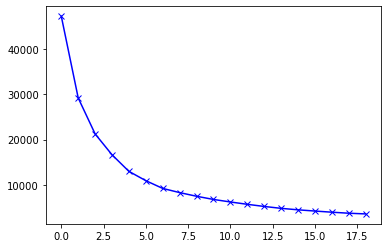

In [31]:
n_clusters=20
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(cck_scaled_pr)
    cost.append(kmean.inertia_)  
   
plt.plot(cost, 'bx-')

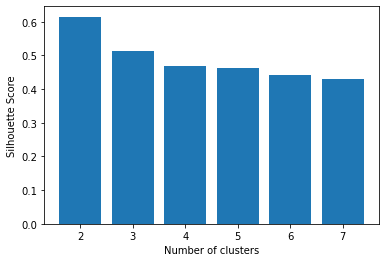

In [32]:
silhouette_scores = [] 
for n_cluster in range(2, 8):
    silhouette_scores.append(   
        silhouette_score(cck_scaled_pr, KMeans(n_clusters = n_cluster).fit_predict(cck_scaled_pr))) 
    
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()    

In [33]:
#Applying k-Means with cluster as 3

In [34]:
db_default = KMeans(n_clusters=4, init='k-means++').fit(cck_scaled_pr) 
labels = db_default.labels_  

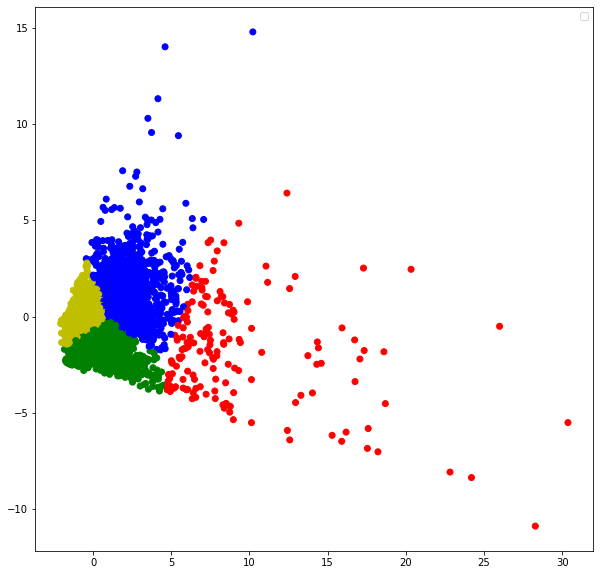

In [35]:
colours = {} 
colours[0] = 'r'
colours[1] = 'y'
colours[2] = 'g'
colours[3] = 'b'
#colours[4] = 'c'
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
#r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
#y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 

#g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(10, 10))  
plt.scatter(cck_scaled_pr['P1'], cck_scaled_pr['P2'], c = cvec) 
  
# Building the legend 
#plt.legend(('r', 'y', 'g'), ('Label 0','Label 1','Label 2')) 
#plt.legend(('r', 'y','g','b','c'), ('Label 0','Label 1','Label 2','Label 3','Label 4')) 
plt.legend(('r', 'y','g','b'), ('Label 0','Label 1','Label 2','Label 3')) 
plt.show() 

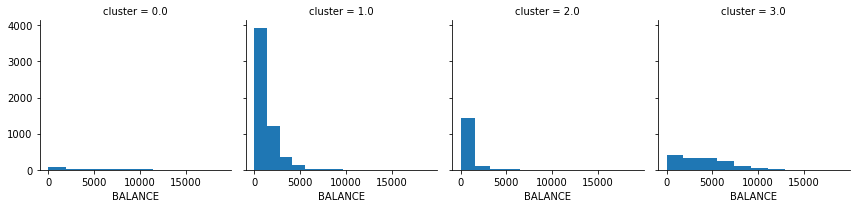

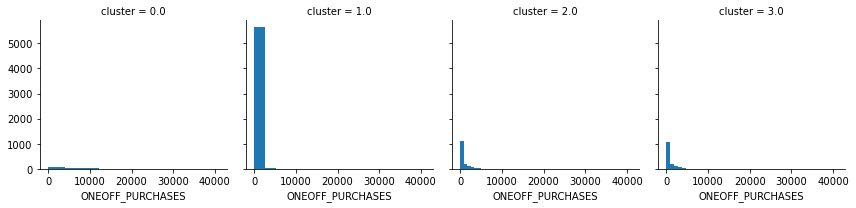

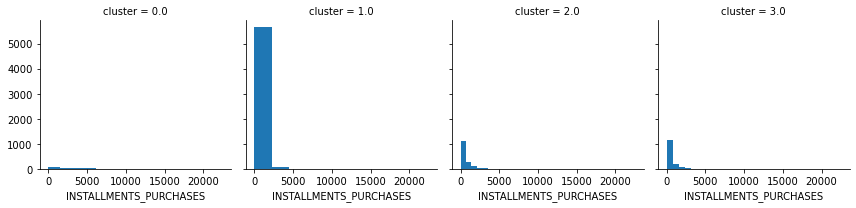

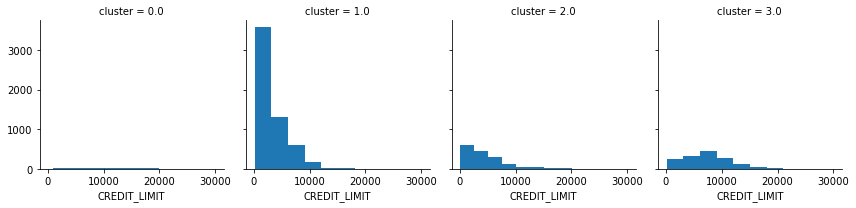

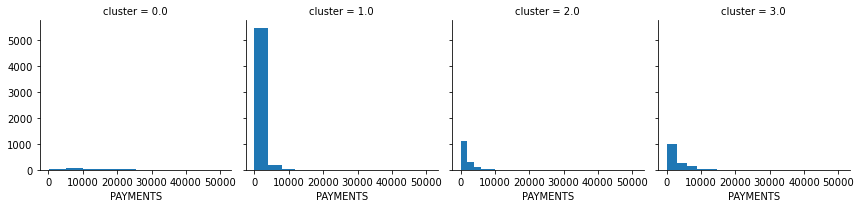

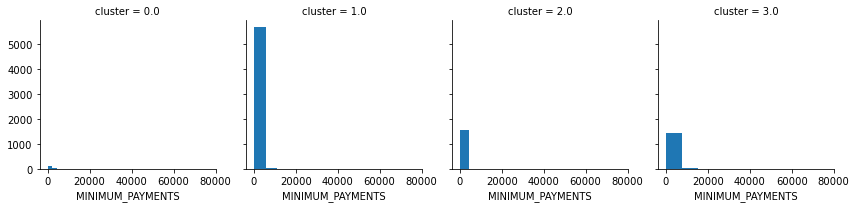

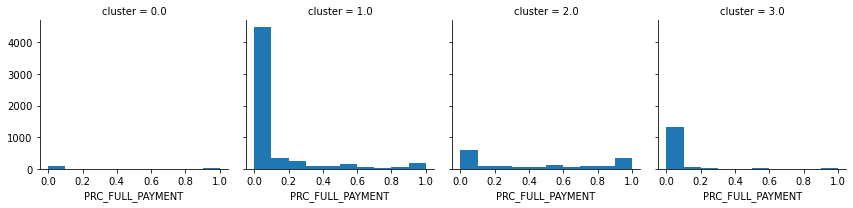

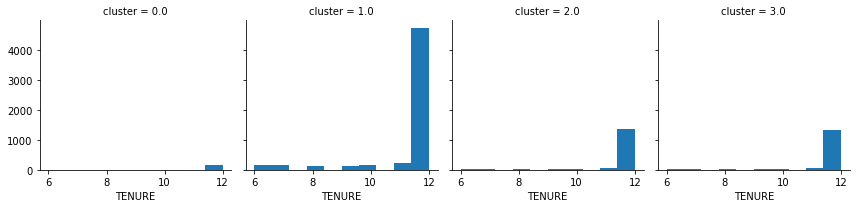

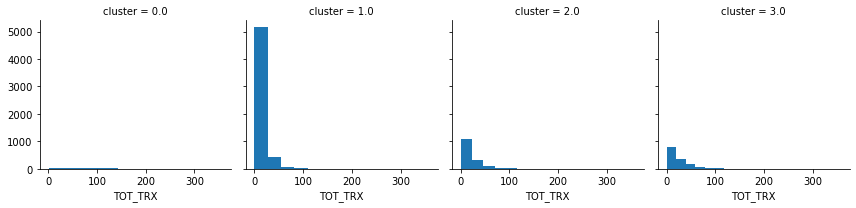

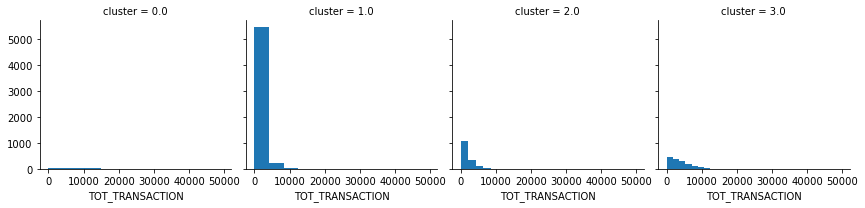

In [36]:
clusters=pd.concat([cck, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

for cols in cck:
    g = sns.FacetGrid(clusters, col = 'cluster')
    g.map(plt.hist, cols)

In [37]:
# assign the label
cck['CLUST_ID'] = labels
cck.head()

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOT_TRX,TOT_TRANSACTION,CLUST_ID
0,40.900749,0.00,95.4,1000.0,201.802084,139.509787,0.000000,12,2,95.400000,1
1,3202.467416,0.00,0.0,7000.0,4103.032597,1072.340217,0.222222,12,4,6442.945483,3
2,2495.148862,773.17,0.0,7500.0,622.066742,627.284787,0.000000,12,12,773.170000,1
3,1666.670542,1499.00,0.0,7500.0,0.000000,864.304943,0.000000,12,2,1704.788017,1
4,817.714335,16.00,0.0,1200.0,678.334763,244.791237,0.000000,12,1,16.000000,1


In [38]:
cck.groupby('CLUST_ID').mean()

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOT_TRX,TOT_TRANSACTION
CLUST_ID,,,,,,,,,,
0,4719.240960,7255.668720,3678.987927,11727.439024,13960.242893,2369.745269,0.336851,11.902439,116.335366,14631.953594
1,1020.653359,218.510908,165.343557,3182.043229,863.416994,562.658026,0.044227,11.438409,9.543017,979.047548
2,262.182650,871.528751,781.077527,4711.863015,1975.499887,226.303239,0.654926,11.536278,25.581703,1868.027912
3,4680.272986,993.951762,598.846510,8485.803446,3458.446414,2529.301220,0.020121,11.760214,31.239786,4548.897439


Text(0.5, 0, 'CLUSTERS')

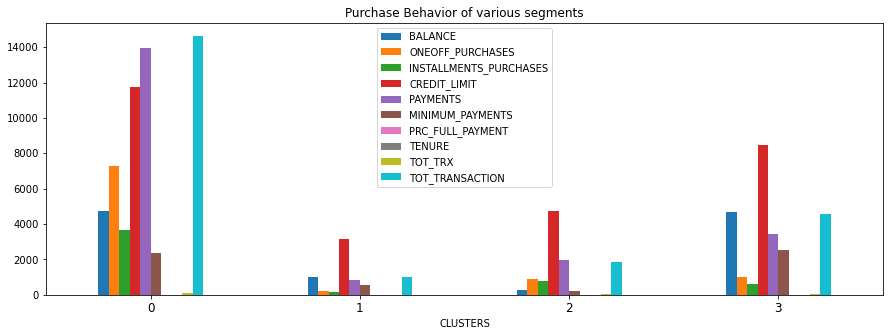

In [45]:
(cck[['BALANCE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'TOT_TRX',
       'TOT_TRANSACTION','CLUST_ID']].groupby('CLUST_ID').mean().plot.bar(figsize=(15, 5)))
plt.title('Purchase Behavior of various segments')
plt.xticks(rotation=360, fontsize=12)
plt.xlabel('CLUSTERS')

**CLUSTER-0** : THESE ARE THE CUSTOMERS WHO HAVE A *HIGH CREDIT LIMIT*, AND TEND TO CROSS THEIR CREDIT LIMITS, BUT THEY ALSO MAKE SIGNIFICANT PAYMENTS TO THEIR ACCOUNT, THEY USUALLY SPEND FOR ONE OFF PURCHASES. HENCE THEY ARE HIGH SPENDERS, AND THEY ALSO MAINTAIN GOOD BALANCE COMPARED TO OTHER CLUSTERS. BUT WE MUST BE CAREFUL AS THEY CROSS THEIR CREDIT LIMIT.

**CLUSTER-1**:THEY ARE LOW SPENDERS, THEY USUSALLY MAINTAIN LOW BALANCE AND THEIR PURCHASE AND SPENDING MDEPENDS ON THEIR BALANCE

**CLUSTER-2** : THEY ARE IDEAL CUSTOMERS, WHERE THEIR TOTAL TRANSACTIONS NEVER CROSSES, THE CREDIT LIMIT, AND THEY PAYMENT IS ALSO UPTO THE MARK, THEY USUALLY SPEND ON BOTH ONE OFF PURCHASES AND INSTALLMENTS, THEY ARE AN IDEAL GROUP OF CUSTOMERS, AND WE MUST DO DOME PROMOTIONAL ACTIVITIES SO THAT THEY SPEND MORE

**CLUSTER-3** : THESE ARE CUSTOMERS, WHO MAINTAIN GOOD BALANCE AND THEIR TRANSACTION IS USUALLY PROPORTION TO THEIR BALANCE, THEY DONT CROSS THE CREDIT LIMIT, AND THEY HAVE RETURNED SIGNIFICANT PORTION OF THEIR, CREDIT VALUE. THEY USUALLY PAY THEIR CREDIT AMOUNT IN MUCH LESSER TRANSACTIONS THAN OTHER CUSTOMERS. HENCE THEY ARE ALSO AN IDEAL SET OF CUSTOMERS, WE MUST REACH OUT TO, SO THAT THEY CAN DO MORE TRANSACTIONS.